# Long Short Term Memory Network (LSTM)

## Stock Price Prediction

In [1]:
# Import libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Read the dataset into a pandas dataframe
df1 = pd.read_csv('../../launchit.csv')
df1.head()

,Date,Open,High,Low,Close,Adj Close,Volume,TCKR,sector,industry,country,growth_rate,target_median_price,target_mean_price,target_high_price
0,2019-12-19,11.000,11.96,10.50,10.70,10.70,89400.0,INDO,Energy,Oil & Gas E&P,Indonesia,1.206,15.0,15.0,15.0
1,2019-12-20,10.808,12.49,9.25,9.65,9.65,503000.0,INDO,Energy,Oil & Gas E&P,Indonesia,1.206,15.0,15.0,15.0
2,2019-12-23,8.790,8.79,7.25,7.81,7.81,117400.0,INDO,Energy,Oil & Gas E&P,Indonesia,1.206,15.0,15.0,15.0
3,2019-12-24,7.500,7.64,6.00,6.41,6.41,102800.0,INDO,Energy,Oil & Gas E&P,Indonesia,1.206,15.0,15.0,15.0
4,2019-12-26,6.420,7.72,6.42,7.41,7.41,78400.0,INDO,Energy,Oil & Gas E&P,Indonesia,1.206,15.0,15.0,15.0


In [25]:
# Make a new copy of the dataset_train 
dataset_train = df1.copy()

In [26]:
# List all of the columns
dataset_train.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'TCKR',
       'sector', 'industry', 'country', 'growth_rate', 'target_median_price',
       'target_mean_price', 'target_high_price'],
      dtype='object')

In [27]:
# Drop qualitative columns
dataset_train = dataset_train.drop(labels=['sector', 'industry', 'country', 'growth_rate', 'target_median_price', 'target_mean_price', 'target_high_price'], axis=1)
dataset_train.head()

,Date,Open,High,Low,Close,Adj Close,Volume,TCKR
0,2019-12-19,11.000,11.96,10.50,10.70,10.70,89400.0,INDO
1,2019-12-20,10.808,12.49,9.25,9.65,9.65,503000.0,INDO
2,2019-12-23,8.790,8.79,7.25,7.81,7.81,117400.0,INDO
3,2019-12-24,7.500,7.64,6.00,6.41,6.41,102800.0,INDO
4,2019-12-26,6.420,7.72,6.42,7.41,7.41,78400.0,INDO


In [28]:
# Isolate just 1 TCKR to attempt LSTM process (train on 2019-2021 data)
INDO_dataset_train = dataset_train[(dataset_train.TCKR == 'INDO') & (dataset_train.Date < '2022-01-01')]
INDO_dataset_train

,Date,Open,High,Low,Close,Adj Close,Volume,TCKR
0,2019-12-19,11.000,11.960,10.500,10.700,10.700,89400.0,INDO
1,2019-12-20,10.808,12.490,9.250,9.650,9.650,503000.0,INDO
2,2019-12-23,8.790,8.790,7.250,7.810,7.810,117400.0,INDO
3,2019-12-24,7.500,7.640,6.000,6.410,6.410,102800.0,INDO
4,2019-12-26,6.420,7.720,6.420,7.410,7.410,78400.0,INDO
...,...,...,...,...,...,...,...,...
508,2021-12-27,2.960,2.979,2.955,2.979,2.979,3700.0,INDO
509,2021-12-28,3.000,3.010,2.950,2.950,2.950,7400.0,INDO
510,2021-12-29,2.950,2.950,2.800,2.800,2.800,8800.0,INDO
511,2021-12-30,2.838,2.838,2.730,2.797,2.797,5200.0,INDO


In [29]:
# Use the Open Stock Price Column to train the model
training_set = INDO_dataset_train.iloc[:,1:2].values

print(training_set)
print(training_set.shape)

[[11.        ]
 [10.80799961]
 [ 8.78999996]
 [ 7.5       ]
 [ 6.42000008]
 [ 7.6500001 ]
 [ 7.25      ]
 [ 7.05000019]
 [ 7.03000021]
 [ 7.1500001 ]
 [ 7.0999999 ]
 [ 7.13000011]
 [ 8.06999969]
 [ 7.26000023]
 [ 7.98999977]
 [ 7.6500001 ]
 [ 7.69999981]
 [ 8.30000019]
 [ 8.68999958]
 [ 8.53999996]
 [ 8.28999996]
 [ 8.19999981]
 [ 7.69999981]
 [ 7.88999987]
 [ 7.78000021]
 [ 7.53999996]
 [ 7.28999996]
 [ 7.26999998]
 [ 7.01000023]
 [ 6.86999989]
 [ 6.75      ]
 [ 6.73999977]
 [ 7.09000015]
 [ 6.82499981]
 [ 6.5       ]
 [ 6.69000006]
 [ 7.        ]
 [ 7.0999999 ]
 [ 7.30000019]
 [ 7.3499999 ]
 [ 6.90299988]
 [ 7.01999998]
 [ 6.73999977]
 [ 6.63800001]
 [ 6.76999998]
 [ 6.57000017]
 [ 6.56500006]
 [ 5.71500015]
 [ 5.25      ]
 [ 5.        ]
 [ 4.90999985]
 [ 5.        ]
 [ 4.99599981]
 [ 4.42000008]
 [ 4.20200014]
 [ 3.18000007]
 [ 2.78999996]
 [ 2.68000007]
 [ 2.3599999 ]
 [ 1.66999996]
 [ 1.54999995]
 [ 1.54999995]
 [ 1.99600005]
 [ 1.59599996]
 [ 2.74000001]
 [ 4.75      ]
 [ 4.15999

In [30]:
# Normalizing the Dataset
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (0,1))
scaled_training_set = scaler.fit_transform(training_set)

scaled_training_set

array([[1.        ],
       [0.9796825 ],
       [0.76613756],
       [0.62962963],
       [0.51534393],
       [0.64550266],
       [0.60317461],
       [0.5820106 ],
       [0.5798942 ],
       [0.5925926 ],
       [0.58730158],
       [0.5904762 ],
       [0.68994706],
       [0.60423283],
       [0.68148146],
       [0.64550266],
       [0.65079363],
       [0.71428574],
       [0.75555551],
       [0.73968254],
       [0.71322751],
       [0.70370369],
       [0.65079363],
       [0.67089946],
       [0.65925928],
       [0.63386243],
       [0.60740741],
       [0.60529101],
       [0.5777778 ],
       [0.56296295],
       [0.55026455],
       [0.54920633],
       [0.5862434 ],
       [0.55820104],
       [0.52380953],
       [0.54391535],
       [0.57671958],
       [0.58730158],
       [0.60846563],
       [0.61375661],
       [0.56645502],
       [0.57883598],
       [0.54920633],
       [0.5384127 ],
       [0.55238095],
       [0.53121695],
       [0.53068784],
       [0.440

In [31]:
scaled_training_set.size

513

In [32]:
scaled_training_set[0:20, 0]

array([1.        , 0.9796825 , 0.76613756, 0.62962963, 0.51534393,
       0.64550266, 0.60317461, 0.5820106 , 0.5798942 , 0.5925926 ,
       0.58730158, 0.5904762 , 0.68994706, 0.60423283, 0.68148146,
       0.64550266, 0.65079363, 0.71428574, 0.75555551, 0.73968254])

In [33]:
scaled_training_set.size*0.05

25.650000000000002

In [35]:
# Define what X and y are
X_train = []
y_train = []
for i in range(26,513):
    X_train.append(scaled_training_set[i-26:i, 0])
    y_train.append(scaled_training_set[i, 0])
X_train = np.array(X_train)
y_train = np.array(y_train)

print(X_train.shape)
print(y_train.shape)

(487, 26)
(487,)


In [36]:
# Reshape the data
X_train = np.reshape(X_train,(X_train.shape[0], X_train.shape[1], 1))
X_train.shape

(487, 26, 1)

In [19]:
# Import libraries
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout

In [37]:
# Build the model and add layers to LSTM
regressor = Sequential()

regressor.add(LSTM(units=50, return_sequences=True, input_shape= (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units=1))

In [38]:
# Fitting the model
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
regressor.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
16/16 [==============================] - 19s 42ms/step - loss: 0.0400
Epoch 2/100
16/16 [==============================] - 1s 43ms/step - loss: 0.0107
Epoch 3/100
16/16 [==============================] - 1s 48ms/step - loss: 0.0110
Epoch 4/100
16/16 [==============================] - 1s 46ms/step - loss: 0.0094
Epoch 5/100
16/16 [==============================] - 1s 46ms/step - loss: 0.0102
Epoch 6/100
16/16 [==============================] - 1s 48ms/step - loss: 0.0087
Epoch 7/100
16/16 [==============================] - 1s 46ms/step - loss: 0.0083
Epoch 8/100
16/16 [==============================] - 1s 61ms/step - loss: 0.0080
Epoch 9/100
16/16 [==============================] - 1s 83ms/step - loss: 0.0076
Epoch 10/100
16/16 [==============================] - 1s 78ms/step - loss: 0.0086
Epoch 11/100
16/16 [==============================] - 1s 60ms/step - loss: 0.0078
Epoch 12/100
16/16 [==============================] - 1s 41ms/step - loss: 0.0075
Epoch 13/100
16/16 [====

In [39]:
# Use 2022 data as testing set
INDO_dataset_test = dataset_train[(dataset_train.TCKR == 'INDO') & (dataset_train.Date >= '2022-01-01')]
INDO_dataset_test

,Date,Open,High,Low,Close,Adj Close,Volume,TCKR
513,2022-01-03,2.838,2.85,2.720,2.846,2.846,2500.0,INDO
514,2022-01-04,2.850,3.45,2.720,2.900,2.900,139200.0,INDO
515,2022-01-05,2.900,2.95,2.770,2.770,2.770,6500.0,INDO
516,2022-01-06,2.630,2.95,2.630,2.850,2.850,2000.0,INDO
517,2022-01-07,2.720,2.80,2.677,2.750,2.750,7200.0,INDO
...,...,...,...,...,...,...,...,...
721,2022-10-31,6.370,6.72,6.340,6.670,6.670,319600.0,INDO
722,2022-11-01,6.900,7.05,6.660,6.750,6.750,374500.0,INDO
723,2022-11-02,6.720,6.88,6.410,6.610,6.610,605100.0,INDO
724,2022-11-03,6.560,6.82,6.542,6.700,6.700,177700.0,INDO


In [55]:
# Extract the testing stock prices
dataset_test = INDO_dataset_test.iloc[:,1:2].values
dataset_test

array([[ 2.83800006],
       [ 2.8499999 ],
       [ 2.9000001 ],
       [ 2.63000011],
       [ 2.72000003],
       [ 2.71000004],
       [ 2.6500001 ],
       [ 2.96000004],
       [ 3.16000009],
       [ 3.11800003],
       [ 3.27999997],
       [ 4.25      ],
       [ 3.66000009],
       [ 3.6500001 ],
       [ 3.42000008],
       [ 3.6500001 ],
       [ 3.41000009],
       [ 3.0999999 ],
       [ 6.17000008],
       [ 5.01000023],
       [ 4.61999989],
       [ 4.0999999 ],
       [ 3.81999993],
       [ 4.03000021],
       [ 4.63000011],
       [ 4.23000002],
       [ 4.23999977],
       [ 4.5999999 ],
       [ 4.5       ],
       [ 4.71999979],
       [ 4.84000015],
       [ 4.57999992],
       [ 4.44999981],
       [ 4.57999992],
       [ 4.90999985],
       [ 7.96999979],
       [14.10000038],
       [10.        ],
       [14.40999985],
       [12.55000019],
       [12.71000004],
       [22.25      ],
       [22.19000053],
       [46.70000076],
       [73.91000366],
       [30

In [56]:
dataset_test.size

213

In [58]:
# Preparing the Input for the Model

# Concatenate all Open values
dataset_total = pd.concat((INDO_dataset_train['Open'], INDO_dataset_test['Open']), axis=0)

inputs = dataset_total[len(dataset_total)- len(dataset_test)-26:].values

inputs = inputs.reshape(-1,1)
inputs = scaler.transform(inputs)

X_test = []
for i in range(26,213):
    X_test.append(inputs[i-26:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0], X_test.shape[1], 1))

print(X_test.shape)

(187, 26, 1)


In [59]:
# Predicting the 2022 Stock Prices
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

6/6 [==============================] - 4s 25ms/step


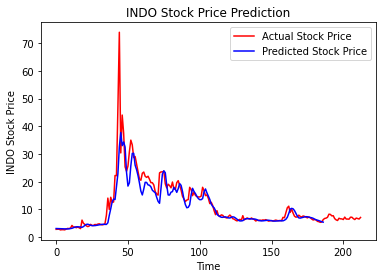

In [61]:
# Plotting the Actual and Predicted Prices
plt.plot(dataset_test, color='red', label='Actual Stock Price')
plt.plot(predicted_stock_price, color='blue', label='Predicted Stock Price')
plt.title('INDO Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('INDO Stock Price')
plt.legend()